In [32]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import datetime

plt.style.use('classic')


In [2]:
df_sellado = pd.read_csv('datos_limpios/cln_sellado.csv', parse_dates=['FECHA'])
df_extrusion = pd.read_csv('datos_limpios/cln_extrusion.csv', parse_dates=['fecha_chida'])
df_impresion = pd.read_csv('datos_limpios/cln_impresion.csv', parse_dates=['FECHA'])

df_sellado.columns

Index(['Unnamed: 0', 'FECHA', 'SEMANA', 'TURNO', 'HORA DE INICIO',
       'RESPONSABLE', 'OPERADORES', 'NUMERO DE PEDIDO', 'SELL.',
       'NOMBRE DEL PEDIDO', 'TIPO DE BOLSA', 'MEDIDA', 'CALIBRE',
       'GPM (Golpes por minuto)', 'TEMPERATURA DE SELLADO (INFERIOR)',
       'TEMPERATURA DE SELLADO (SUPERIOR)', 'PESO/BULTO', 'KG/DE BOBINA',
       'N° DE BULTOS', 'PROMEDIO', 'MILLARES', 'SERIALIZADO INICIO',
       'SERIALIZADO FIN', 'PESO DE TROQUEL', 'MERMA EXTRUSION',
       'CAUSAS EXTRUSION', 'MER IMPRESIÓN', 'CAUSAS IMPRESIÓN',
       'IMPRESIÓN  MERMA POR PROCESO', 'MERMA SELLADO', 'CAUSAS SELLADO',
       'BOLSA DE 2A', 'ORIGEN', 'CUARENTENA', 'BASURA', 'MUESTRAS',
       'HORA FINAL', 'HORAS DE TRABAJO', 'year', 'month', 'day'],
      dtype='object')

In [3]:
df_sellado

,Unnamed: 0,FECHA,SEMANA,TURNO,HORA DE INICIO,RESPONSABLE,OPERADORES,NUMERO DE PEDIDO,SELL.,NOMBRE DEL PEDIDO,...,BOLSA DE 2A,ORIGEN,CUARENTENA,BASURA,MUESTRAS,HORA FINAL,HORAS DE TRABAJO,year,month,day
0,0,2019-01-02,1,2.0,5:00:00 p. m.,RESPONSABLE1,OPERADORES1,SAP-1615,SEL003,BELLE-001,...,0.54,NaN,NaN,0.12,0.05,21:40:00,4.70,2019,1,2
1,1,2019-01-02,1,2.0,5:00:00 p. m.,RESPONSABLE1,OPERADORES2,SAP-1604,SEL011,SAPI-001,...,0.00,NaN,NaN,0.30,0.1,21:45:00,4.75,2019,1,2
2,2,2019-01-02,1,3.0,10:00:00 p. m.,RESPONSABLE2,OPERADORES3,SAP-1615,SEL003,BELLE-001,...,1.10,IMP. Y SELL,NaN,0.00,0.06,5:00:00,7.00,2019,1,2
3,3,2019-01-02,1,3.0,10:00:00 p. m.,RESPONSABLE2,OPERADORES4,SAP-1604,SEL011,SAPI-001,...,0.00,NaN,NaN,0.10,0.14,3:00:00,5.00,2019,1,2
4,4,2019-01-03,1,1.0,7:00:00 a. m.,RESPONSABLE3,OPERADORES5,SAP-1606,SEL011,YELI-002,...,0.00,NaN,NaN,0.00,0.13,9:00:00,2.00,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,3763,2019-10-02,40,2.0,10:00:00 p. m.,RESPONSABLE1,OPERADORES11,SAP-2676,SEL012,TEPU-001,...,0.00,NaN,NaN,0.03,0.08,22:00:00,0.00,2019,10,2
3764,3764,2019-10-03,40,3.0,10:00:00 p. m.,RESPONSABLE2,OPERADORES4,SAP-240919,SEL005,CHED-002,...,0.00,NaN,NaN,0.05,0.07,6:00:00,8.00,2019,10,3
3765,3765,2019-10-03,40,3.0,10:00:00 p. m.,RESPONSABLE2,OPERADORES5,280919,SEL009,PROI-028,...,0.00,NaN,NaN,0.54,0.08,6:00:00,8.00,2019,10,3
3766,3766,2019-10-03,40,3.0,10:00:00 p. m.,RESPONSABLE2,OPERADORES3,SAP-2650B,SEL011,LAHO-007,...,0.00,NaN,NaN,0.00,0,6:00:00,8.00,2019,10,3


In [4]:
df_sellado.shape

(3768, 41)

In [5]:
mer_ex = df_sellado[df_sellado['MERMA EXTRUSION'] > 0][['NUMERO DE PEDIDO', 'OPERADORES', 'MERMA EXTRUSION']]
mer_im = df_sellado[df_sellado['MER IMPRESIÓN'] > 0][['NUMERO DE PEDIDO', 'OPERADORES', 'MER IMPRESIÓN']]
mer_se = df_sellado[df_sellado['MERMA SELLADO'] > 0][['NUMERO DE PEDIDO', 'OPERADORES', 'MERMA SELLADO']]

## Pregunta 8

In [6]:
# se eliminan nulos
mer_se = mer_se[~mer_se['NUMERO DE PEDIDO'].isnull()]

In [7]:
#solo se tiene un registro si numero de pedido

mer_se.shape
mer_se = mer_se['NUMERO DE PEDIDO'].unique() 

In [8]:
# se ontienen solo los nombres de los pedidos con merma positiva en el sellado

df = df_extrusion[df_extrusion['N° DE PEDIDO'].isin(mer_se)] 

In [9]:
# se obtienen los pedidos con merma positiva en el sellado y que esten en la base de datos de extrusion

df = df[['OPERADOR', 'FECHA']].groupby('OPERADOR').count()
df = df.rename({'FECHA':'count'}, axis=1)

In [10]:

df.sort_values(by='count', ascending=False)

,count
OPERADOR,
OPERADOR5,2090
OPERADOR4,1794
OPERADOR3,1623
OPERADOR1,174
OPERADOR6,136
OPERADOR7,110
OPERADOR9,48
OPERADOR8,41


## Pregunta 9

In [11]:

df = df_impresion[df_impresion['N° DE PEDIDO'].isin(mer_se)] 

In [12]:
# se obtienen los pedidos con merma positiva en el sellado y que esten en la base de datos de impresion

df = df[['OPERADOR', 'FECHA']].groupby('OPERADOR').count()
df = df.rename({'FECHA':'count'}, axis=1)

In [13]:
df.sort_values(by='count', ascending=False)

,count
OPERADOR,
OPERADOR4,805
OPERADOR5,764
OPERADOR2,760
OPERADOR7,717
OPERADOR1,703
OPERADOR8,665
OPERADOR3,534
OPERADOR6,459
OPERADOR10,1


## Pregunta 10

In [14]:
df = df_impresion[df_impresion['N° DE PEDIDO'].isin(mer_se)] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5408 entries, 0 to 6364
Data columns (total 25 columns):
Unnamed: 0           5408 non-null int64
SEMANA               5408 non-null float64
FECHA                5408 non-null datetime64[ns]
TURNO                5406 non-null float64
IMPRESORA            5391 non-null float64
OPERADOR             5408 non-null object
N° DE PEDIDO         5408 non-null object
CLAVE SAP            2246 non-null object
NOMBRE DE PEDIDO     5408 non-null object
TIPO DE PRODUCTO     5408 non-null object
ANCHO DE PELICULA    5396 non-null object
TINTAS               49 non-null object
FOLIO DEL ROLLO      5157 non-null object
HORA INICIO          5319 non-null object
HORA FINAL           5311 non-null object
PESO DE ROLLO        5145 non-null object
RECUPERADO           403 non-null object
% DE RECUP           3 non-null object
HORAS DE TRABAJO     5407 non-null object
DISCO                0 non-null float64
year                 5408 non-null int64
month     

In [15]:
df = df_impresion[df_impresion['N° DE PEDIDO'].isin(mer_se)] 

df = df[['SEMANA', 'FECHA', 'TURNO', 'HORA INICIO', 'HORA FINAL', 'week']].groupby('SEMANA').count()
df = df.rename({'week':'count'}, axis=1)

In [16]:
df

,FECHA,TURNO,HORA INICIO,HORA FINAL,count
SEMANA,,,,,
1.0,51,51,0,0,51
2.0,107,107,105,105,107
3.0,117,117,116,116,117
4.0,78,78,77,77,78
5.0,138,138,137,137,138
6.0,72,72,70,70,72
7.0,108,108,108,108,108
8.0,100,100,100,100,100
9.0,130,130,129,129,130


Text(0.5, 0, 'Distribucion semanal de pedidos con merma positiva en impresion')

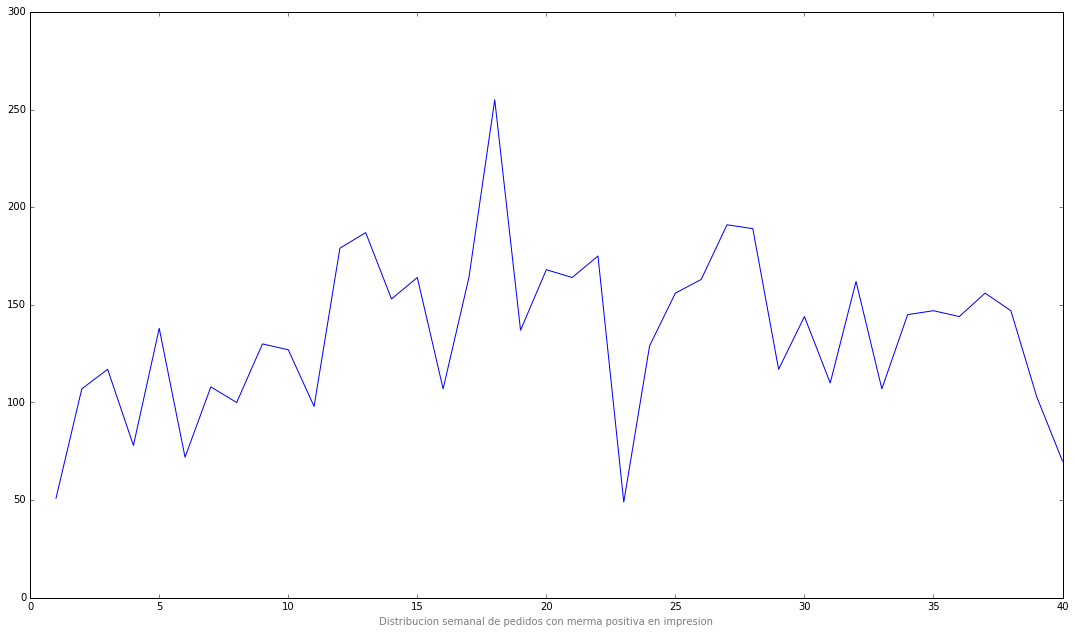

In [23]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.5)

ax.plot(df.index, df['count'])
ax.set_xlabel('Distribucion semanal de pedidos con merma positiva en impresion', alpha=0.5)


In [25]:
df = df_impresion[df_impresion['N° DE PEDIDO'].isin(mer_se)] 

df = df[['SEMANA', 'FECHA', 'TURNO', 'HORA INICIO', 'HORA FINAL', 'week']].groupby('TURNO').count()
df = df.rename({'week':'count'}, axis=1)
df

,SEMANA,FECHA,HORA INICIO,HORA FINAL,count
TURNO,,,,,
1.0,2867,2867,2817,2811,2867
2.0,2507,2507,2468,2466,2507
3.0,14,14,14,14,14
4.0,9,9,9,9,9
5.0,3,3,3,3,3
6.0,3,3,3,3,3
7.0,3,3,3,3,3


In [26]:
df = df_impresion[df_impresion['N° DE PEDIDO'].isin(mer_se)] 

df = df[['SEMANA', 'FECHA', 'TURNO', 'HORA INICIO', 'HORA FINAL', 'week']].groupby('FECHA').count()
df = df.rename({'week':'count'}, axis=1)
df

,SEMANA,TURNO,HORA INICIO,HORA FINAL,count
FECHA,,,,,
2019-01-02,7,7,0,0,7
2019-01-03,27,27,0,0,27
2019-01-04,11,11,0,0,11
2019-01-05,6,6,0,0,6
2019-01-07,4,4,4,4,4
...,...,...,...,...,...
2019-09-28,4,4,4,4,4
2019-09-30,28,28,28,28,28
2019-10-01,25,25,25,25,25


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Distribucion diaria de pedidos con merma positiva en impresion')

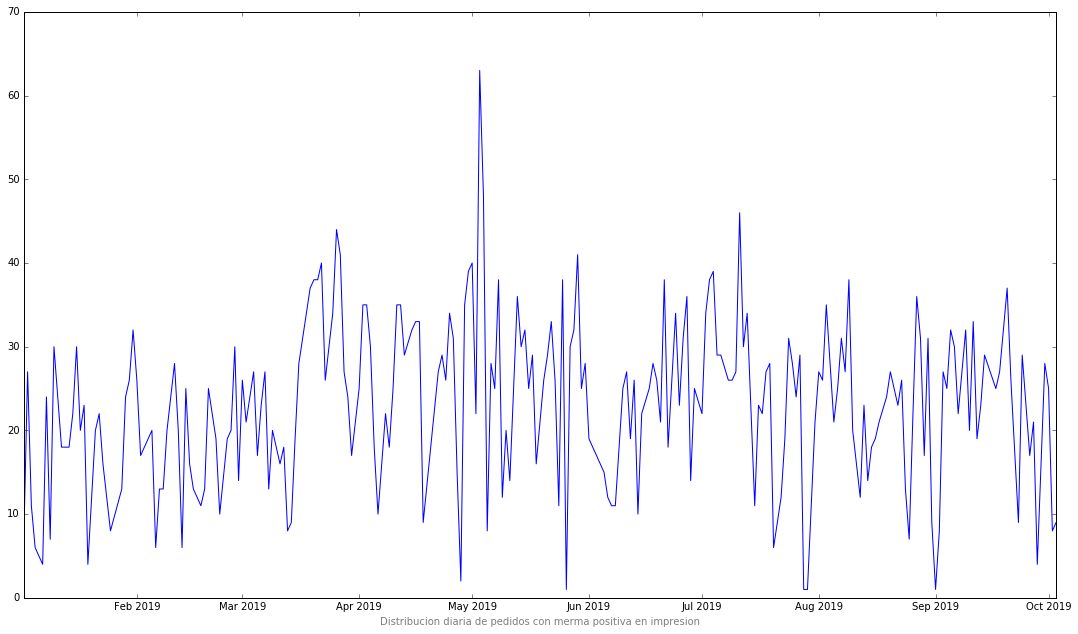

In [27]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.5)

ax.plot(df.index, df['count'])
ax.set_xlabel('Distribucion diaria de pedidos con merma positiva en impresion', alpha=0.5)


In [29]:
df = df_impresion[df_impresion['N° DE PEDIDO'].isin(mer_se)]
df = df[~df['HORA FINAL'].isnull()]

In [45]:
promedio = datetime.datetime.strptime('10:00:00', '%I:%M:%S').time() 
print(promedio)

10:00:00


## Pregunta 11

In [55]:
df = df_extrusion[df_extrusion['N° DE PEDIDO'].isin(mer_se)] 

df = df[['SEMANA', 'fecha_chida', 'TURNO', 'HORA INICIO', 'HORA FINAL', 'week_chida']].groupby('SEMANA').count()
df = df.rename({'week_chida':'count'}, axis=1)

Text(0.5, 0, 'Distribucion semanal de pedidos con merma positiva en extrusion')

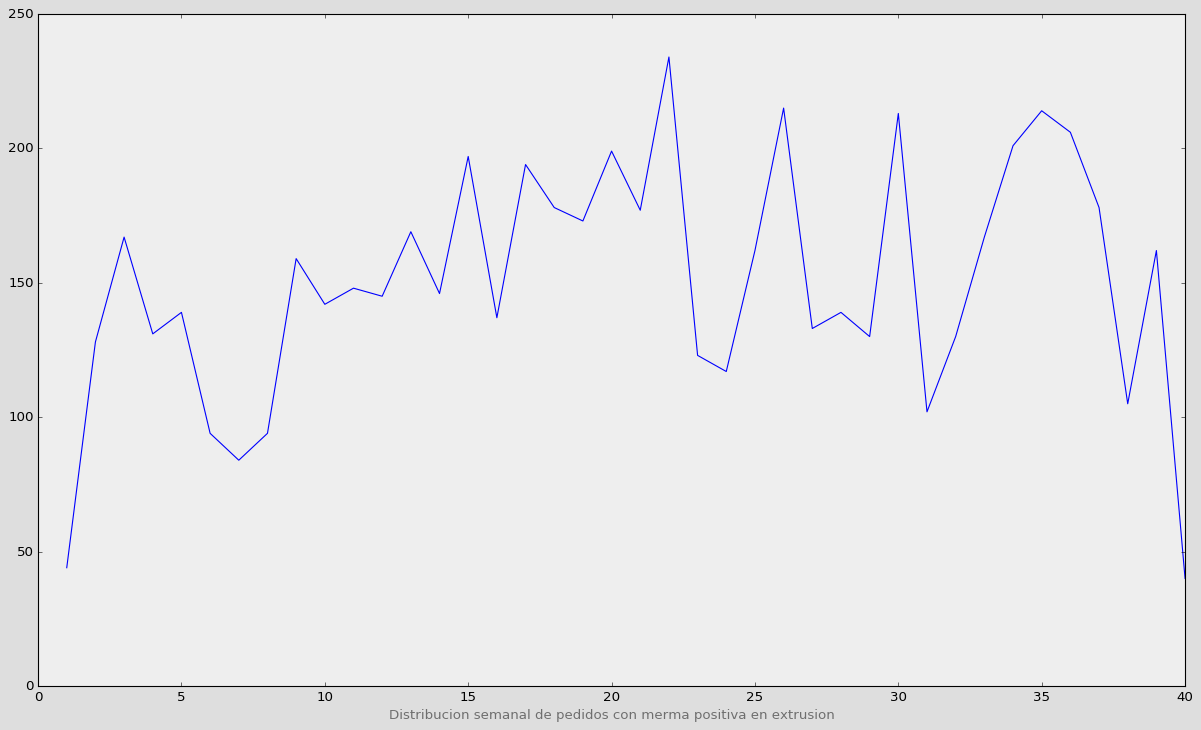

In [57]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.5)

ax.plot(df.index, df['count'])
ax.set_xlabel('Distribucion semanal de pedidos con merma positiva en extrusion', alpha=0.5)


In [58]:
df = df_extrusion[df_extrusion['N° DE PEDIDO'].isin(mer_se)] 

df = df[['SEMANA', 'FECHA', 'TURNO', 'HORA INICIO', 'HORA FINAL', 'week_chida']].groupby('TURNO').count()
df = df.rename({'week_chida':'count'}, axis=1)
df

,SEMANA,FECHA,HORA INICIO,HORA FINAL,count
TURNO,,,,,
1.0,1921,1921,1917,1917,1921
2.0,2119,2119,2119,2119,2119
3.0,1975,1975,1975,1975,1975


In [61]:
df = df_extrusion[df_extrusion['N° DE PEDIDO'].isin(mer_se)] 

df = df[['SEMANA', 'fecha_chida', 'TURNO', 'HORA INICIO', 'HORA FINAL', 'week_chida']].groupby('fecha_chida').count()
df = df.rename({'week_chida':'count'}, axis=1)
df

,SEMANA,TURNO,HORA INICIO,HORA FINAL,count
fecha_chida,,,,,
2019-01-02,19,19,19,19,19
2019-01-03,13,13,13,13,13
2019-01-04,12,12,12,12,12
2019-01-07,25,25,25,25,25
2019-01-08,11,11,11,11,11
...,...,...,...,...,...
2019-09-26,26,26,26,26,26
2019-09-27,33,33,33,33,33
2019-09-28,30,30,30,30,30


Text(0.5, 0, 'Distribucion diaria de pedidos con merma positiva en extrusion')

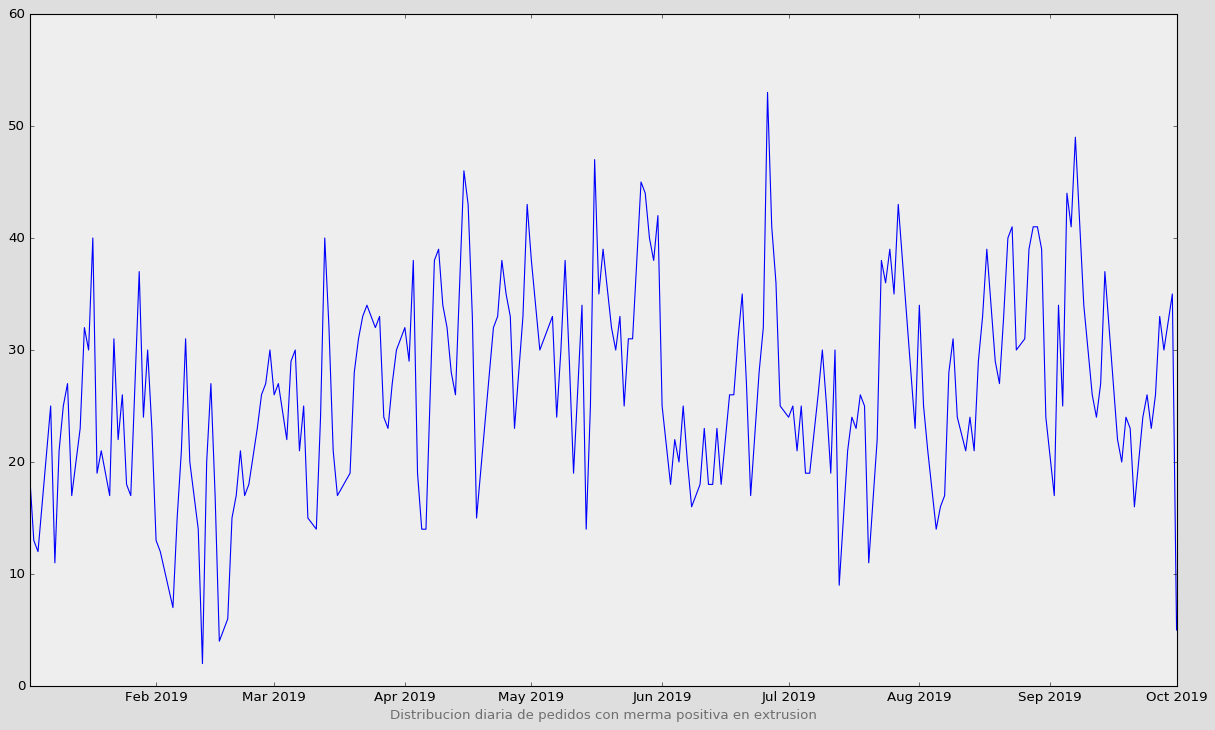

In [62]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.5)

ax.plot(df.index, df['count'])
ax.set_xlabel('Distribucion diaria de pedidos con merma positiva en extrusion', alpha=0.5)
